# Main Objective
> How to perform cost and profitability analysis of a business operation.

> **Food Delivery Cost and Profitability Analysis** is a detailed review of how a food delivery service spends and earns money. Its purpose is to find ways to cut unnecessary costs, boost income, and adjust pricing or commission rates so the business can make more profit.

> **Food Delivery Cost and Profitability Analysis** is a process of looking at all the expenses involved in delivering food, from direct costs like driver pay, fuel, and packaging to indirect costs like customer discounts and restaurant commissions, and comparing them with the money the service earns from order values, delivery fees, and commissions. 

> This helps the business see exactly how much profit it makes on each order, spot areas to cut costs, and find ways to adjust pricing or commissions to boost overall profitability.

## Case Study:
You are a data scientist at a food delivery company that is struggling to turn a profit. The company has provided you with a dataset containing details of 1,000 food orders, including order values, delivery fees, discounts, commissions, and other cost components. Your task is to analyze the cost structure and revenue streams to determine per-order profitability, identify patterns affecting overall margins, and recommend data-driven strategies to improve the company’s financial performance.

### Data Understanding
1. **Order ID**: A unique code or number for each order.
2. **Customer ID**: A unique identifier for each customer.
3. **Restaurant ID**: A unique identifier for each restaurant.
4. **Order Date and Time**: The exact date and time when the customer placed the order.
5. **Delivery Date and Time**: The exact date and time when the order was delivered to the customer.
6. **Order Value**: The total price of the food items ordered before adding delivery fees, taxes, or discounts.
7. **Delivery Fee**: The amount charged to the customer for delivering the order (sometimes also includes a service charge).
8. **Payment Method**: How the customer paid — e.g., credit card, debit card, cash on delivery, digital wallet.
9. **Discounts and Offers**: The total value of price reductions applied to the order.
10. **Commission Fee**: The percentage or fixed amount the delivery platform takes from the restaurant’s earnings for facilitating the order.
11. **Payment Processing Fee**: The fee charged by payment processors.
12. **Refunds/Chargebacks**: Money the company returns to the customer because of an issue (wrong order, late delivery, payment dispute, etc.).

In [33]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("datasets/food_orders_new_delhi.csv")

In [4]:
dataset.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [5]:
dataset.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


### Data Preprocessing

In [7]:
# Converting 'Time' features from Object Type to Date type.
dataset['Delivery Date and Time'] = pd.to_datetime(dataset['Delivery Date and Time'])
dataset['Order Date and Time'] = pd.to_datetime(dataset['Order Date and Time'])

In [8]:
# Discounts and Offers
def extract_discounts(discount_str):
    try:
        if(isinstance(discount_str, str)):
            if('%' in discount_str):
                return float(discount_str.split("%")[0])
            elif('off' in discount_str):
                return float(discount_str.split(' ')[0])
    except Exception:
        pass
    
    return 0.0 # No Discount

In [9]:
dataset['Discount Percentage'] = dataset['Discounts and Offers'].apply(lambda x: extract_discounts(x))

In [10]:
# Calculating Discount Amount based on 'Order Value' and 'Discount Percentage'
dataset['Discount Amount'] = dataset.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100) 
                                           if x['Discount Percentage'] > 1 
                                           else x['Discount Percentage'], axis=1)

In [11]:
dataset.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


## Cost and Profitability Analysis
### Cost Analysis
**Revenue**  → All the money your business earns from sales before subtracting any costs.  
Example: If an order costs $30 (food + delivery fee), your revenue is $30.

**Cost** → All the money your business spends to provide the service. This includes both:

1. **Direct costs** (costs tied directly to fulfilling an order — e.g., delivery driver fee, packaging, payment processor fee).  
2. **Indirect costs** (overheads or less directly linked costs — e.g., marketing discounts, refunds).  

**Profit** → What’s left after subtracting all costs from revenue. Formula: $\text{Profit} = \text{Revenue} - \text{Total Cost}$

## Assumptions for Analysis
Since the dataset lacks explicit driver wages, packaging costs, and marketing expenses, we make the following assumptions to create a realistic financial model:  

#### Revenue Streams for the Platform
1. **Commission Fee** – Main source of revenue from restaurants!  
2. **Delivery Fee** (Customer-Paid) – It retained by the platform!

#### Costs to the Platform
1. **Delivery Cost** - In absence of direct data, we assume **Delivery Cost = 80% of Delivery Fee**  
2. **Payment Processing Fee** – Percentage charged by payment gateway (already in dataset).  
3. **Discounts and Offers** – We assume it is funded entirely by the platform, counted fully as a cost! (**Discount Amount** calculated already!)  
4. **Refunds/Chargebacks** – Full amount treated as a cost.

#### Delivery Fee Inspection
We are performing **Delivery Fee** inspection because the Delivery Fee is part of the platform’s revenue, but 168 out of 1,000 orders have a fee of zero. Since we cannot confirm the reason with stakeholders, we first explore the data to identify any patterns (e.g., certain restaurants, dates, or promotions) that could explain these missing fees. Based on our findings, we will later make a documented assumption to handle these cases consistently in our profitability analysis.

In [12]:
# Checking if zero-fee orders are linked to a specific restaurant.
dataset[dataset['Delivery Fee'] == 0]['Restaurant ID'].value_counts().head(10)

Restaurant ID
R2570    3
R2343    3
R2225    2
R2520    2
R2915    2
R2028    2
R2038    2
R2591    2
R2215    2
R2804    2
Name: count, dtype: int64

In [13]:
# Checking if zero-fee orders are linked to a specific customer!
dataset[dataset['Delivery Fee'] == 0]['Customer ID'].value_counts().head()

Customer ID
C7316    2
C2365    2
C9666    2
C8041    2
C3832    1
Name: count, dtype: int64

In [14]:
# Checking if zero-fee orders are linked to a specific date ramge!
dataset[dataset['Delivery Fee'] == 0]['Order Date and Time'].dt.date.value_counts().head(10)

Order Date and Time
2024-01-16    10
2024-01-13     8
2024-01-23     7
2024-02-07     7
2024-02-01     7
2024-02-03     7
2024-01-01     7
2024-01-30     6
2024-01-11     6
2024-01-12     6
Name: count, dtype: int64

In [15]:
# Checking delivery times
dataset['Delivery Time (mins)'] = (dataset['Delivery Date and Time'] - dataset['Order Date and Time']).dt.total_seconds() / 60
dataset.groupby(dataset['Delivery Fee'] == 0)['Delivery Time (mins)'].describe()

,count,mean,std,min,25%,50%,75%,max
Delivery Fee,,,,,,,,
False,814.0,73.792383,25.997490,30.0,51.0,74.0,96.0,119.0
True,186.0,72.623656,26.141161,30.0,48.0,73.0,94.0,118.0


##### Summary of Findings
1. **Not tied to specific restaurants** → So, not restaurant-sponsored free delivery!  
2. **Not tied to specific customers** → Not a loyalty perk or individual promotion!  
3. **Somewhat clustered by date** → Could indicate general promotional campaigns (e.g., “Free Delivery Weekend”)!  
4. **Delivery times are similar** → Suggests these orders were indeed delivered, not picked up!

##### Given that:

1. These orders appear to be actual deliveries, and
2. The platform earned no delivery fee from the customer, and
3. We have no evidence that restaurants or customers paid for delivery elsewhere...

> We assume that the platform paid for delivery out of pocket as part of a promotion.

**In other words**:  

**💡 Assumption**: Orders with a delivery fee of 0 were part of platform-funded free delivery promotions. The company still paid the driver, but did not earn any delivery fee from the customer. Therefore, a delivery cost is still incurred.

### Calculating Key Metrics
##### Calculate Total Cost Per Order
We use 80% of the actual delivery fee if it's greater than 0, otherwise estimate using the average paid delivery fee!

In [16]:
# Average delivery fee from paid orders
avg_fee = dataset[dataset['Delivery Fee'] > 0]['Delivery Fee'].mean()

# Adjusted Delivery Cost (80% of actual or average)
dataset['Delivery Cost'] = dataset['Delivery Fee'].apply(
    lambda x: 0.8 * x if x > 0 else 0.8 * avg_fee
)

In [17]:
# Total Cost Per Order
dataset['Total Cost Per Order'] = (
    dataset['Delivery Cost'] +
    dataset['Payment Processing Fee'] +
    dataset['Discount Amount'] +
    dataset['Refunds/Chargebacks']
)

##### Calculate Total Revenue Per Order

In [19]:
dataset['Delivery Revenue'] = dataset['Delivery Fee'] * 0.2

In [21]:
dataset['Total Revenue Per Order'] = (
    dataset['Commission Fee'] + dataset['Delivery Revenue']
)

##### Calculating Total Profit Per Order

In [23]:
dataset['Profit Per Order'] = (
    dataset['Total Revenue Per Order'] - dataset['Total Cost Per Order']
)

### Exploratory Data Analysis
#### Is the company generating a net profit or net loss across all orders?
(**Net** refers to the final amount after all **revenues** and **expenses** have been accounted for)!  
1. **Net Profit**: $\text{Total Revenue} - \text{Total Cost}$  
2. If the result is **positive**, the company made a **net profit**.  
2. If the result is **negative**, the company incurred a **net loss**.

In [28]:
totalRevenue = dataset['Total Revenue Per Order'].sum()

totalCost = dataset['Total Cost Per Order'].sum()

netProfit = totalRevenue - totalCost

In [31]:
print(f"Total Revenue: {totalRevenue}")
print(f"Total Cost: {totalCost}")
print(f"Net Profit/Loss: {netProfit}")

if netProfit > 0:
    print(f"✅ The company is generating a net profit. {netProfit}")
elif netProfit < 0:
    print(f"❌ The company is operating at a net loss. {netProfit}")
else:
    print(f"⚖️ The company is breaking even. {netProfit}")

Total Revenue: 132714.0
Total Cost: 260517.61412776413
Net Profit/Loss: -127803.61412776413
❌ The company is operating at a net loss. -127803.61412776413


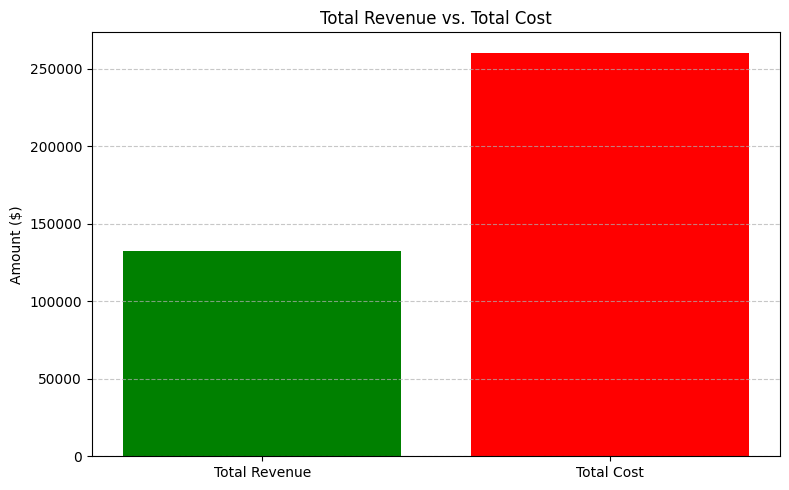

In [34]:
# Visualizing Total Revenue vs. Total Cost with Bar Plot.
plt.figure(figsize=(8, 5))
plt.bar(['Total Revenue', 'Total Cost'], [totalRevenue, totalCost], color=['green', 'red'])
plt.title('Total Revenue vs. Total Cost')
plt.ylabel('Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

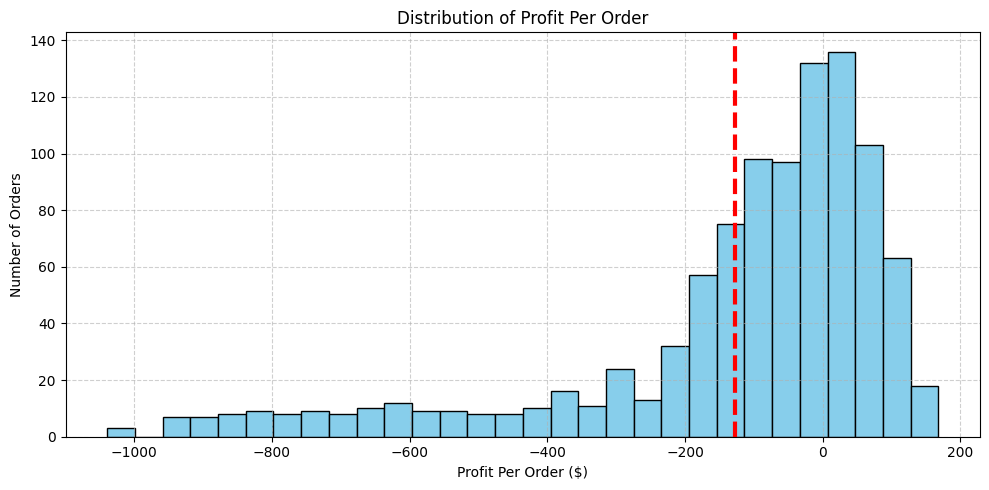

In [38]:
# Profit per order distribution (Histogram)
plt.figure(figsize=(10, 5))
plt.hist(dataset['Profit Per Order'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Profit Per Order')
plt.xlabel('Profit Per Order ($)')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.axvline(dataset['Profit Per Order'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()

1. **Left Skewed**: Most orders are clustered around negative profits, with only a small tail of orders making a profit. This suggests that loss-making orders dominate the dataset!  
2. **Red Dashed Line**: It shows the average profit per order. It is **below zero**, confirming that the company is losing money on most orders! (Even though a few orders are profitable, they’re not enough to offset the widespread losses)!
3. Some orders lose a lot, some lose a little, and a few make money!  
